In [1]:
from pamod.preprocessing import StaticProcessEngine
from pamod.descriptives import DescriptivesPlotter

2024-09-05 12:34:40.107 | INFO     | pamod.config:<module>:11 - PROJ_ROOT path is: C:\Users\Admin\pa-modeling


In [2]:
engine = StaticProcessEngine(behavior=False, scale=False, encoding=None)
df = engine.load_data()
df = engine.process_data()
plotter = DescriptivesPlotter(df)

Patients with missing age: [1903, 1910, 1919, 1942, 1948]
Patients with missing boprevaluation: [64, 79, 110, 215, 245, 278, 353, 365, 430, 452, 484, 497, 517, 613, 962, 1304, 1645]


C:\Users\Admin\pa-modeling\pamod\preprocessing\_preprocessing.py:287: UserWarning: Missing values found in the following columns: 
age               786
boprevaluation    567
dtype: int64
  warnings.warn(f"Missing values found in the following columns: \n{missing_values[missing_values > 0]}")


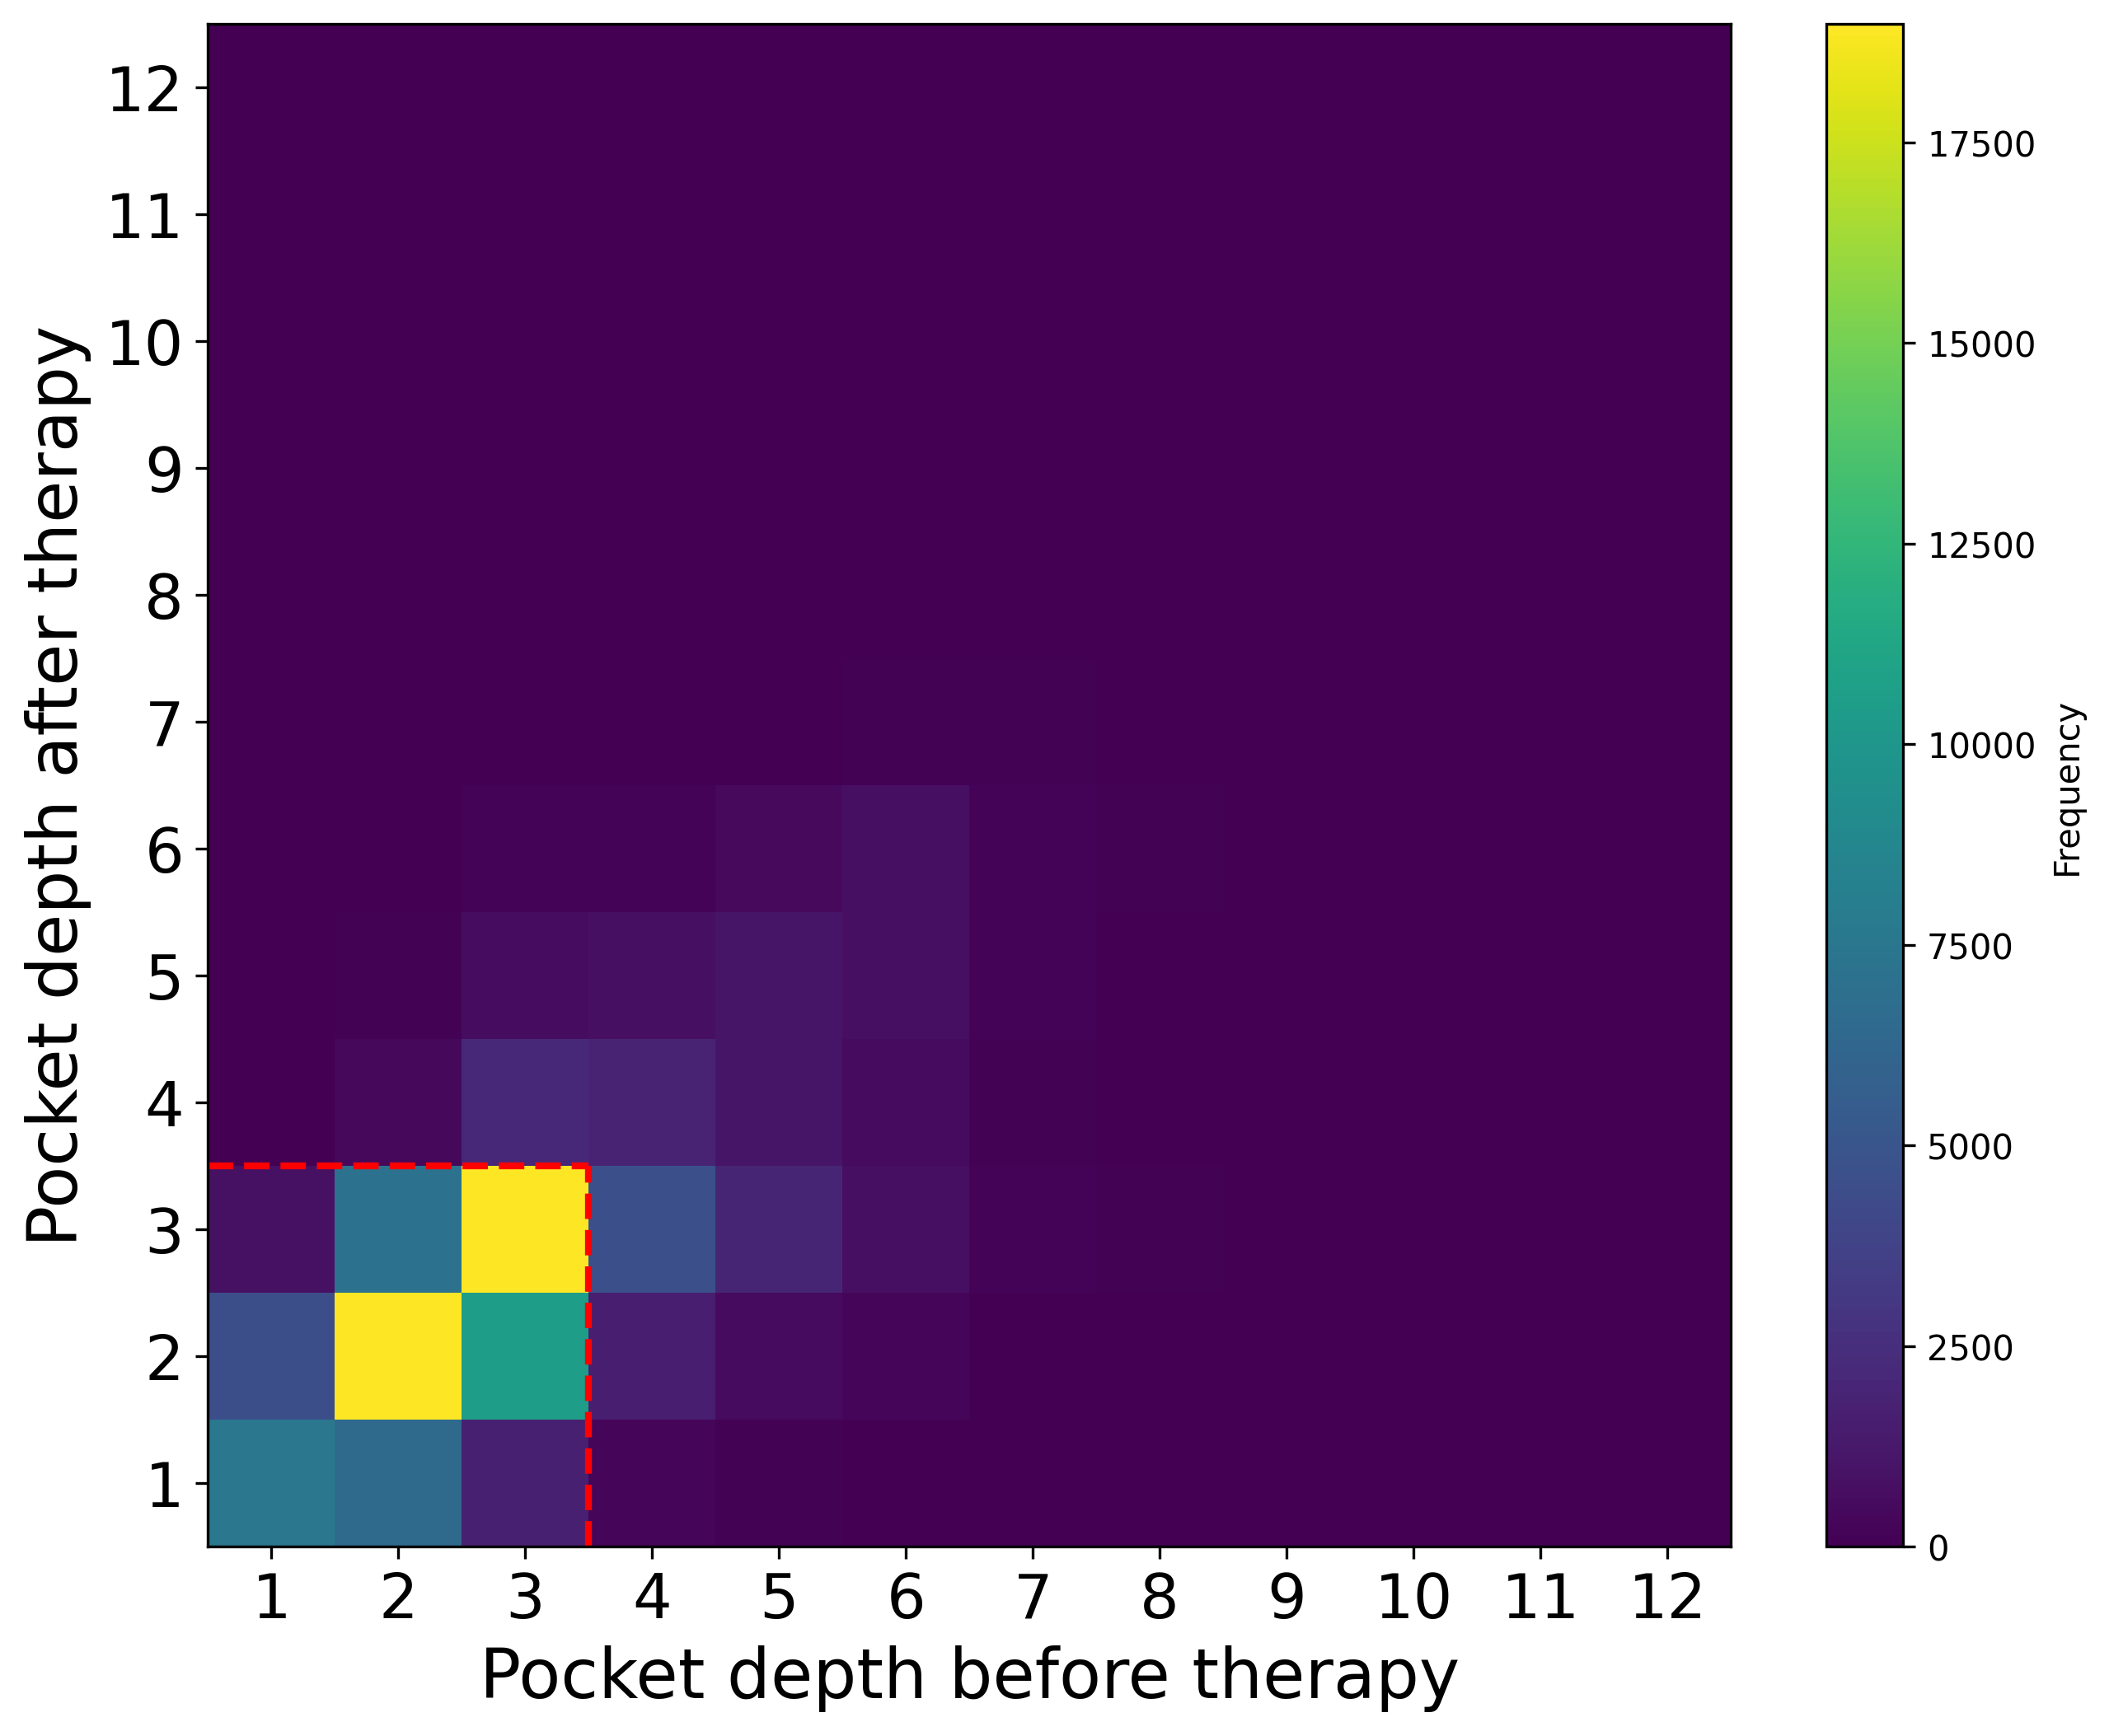

In [3]:
plotter.histogram_2d("pdbaseline", "pdrevaluation")

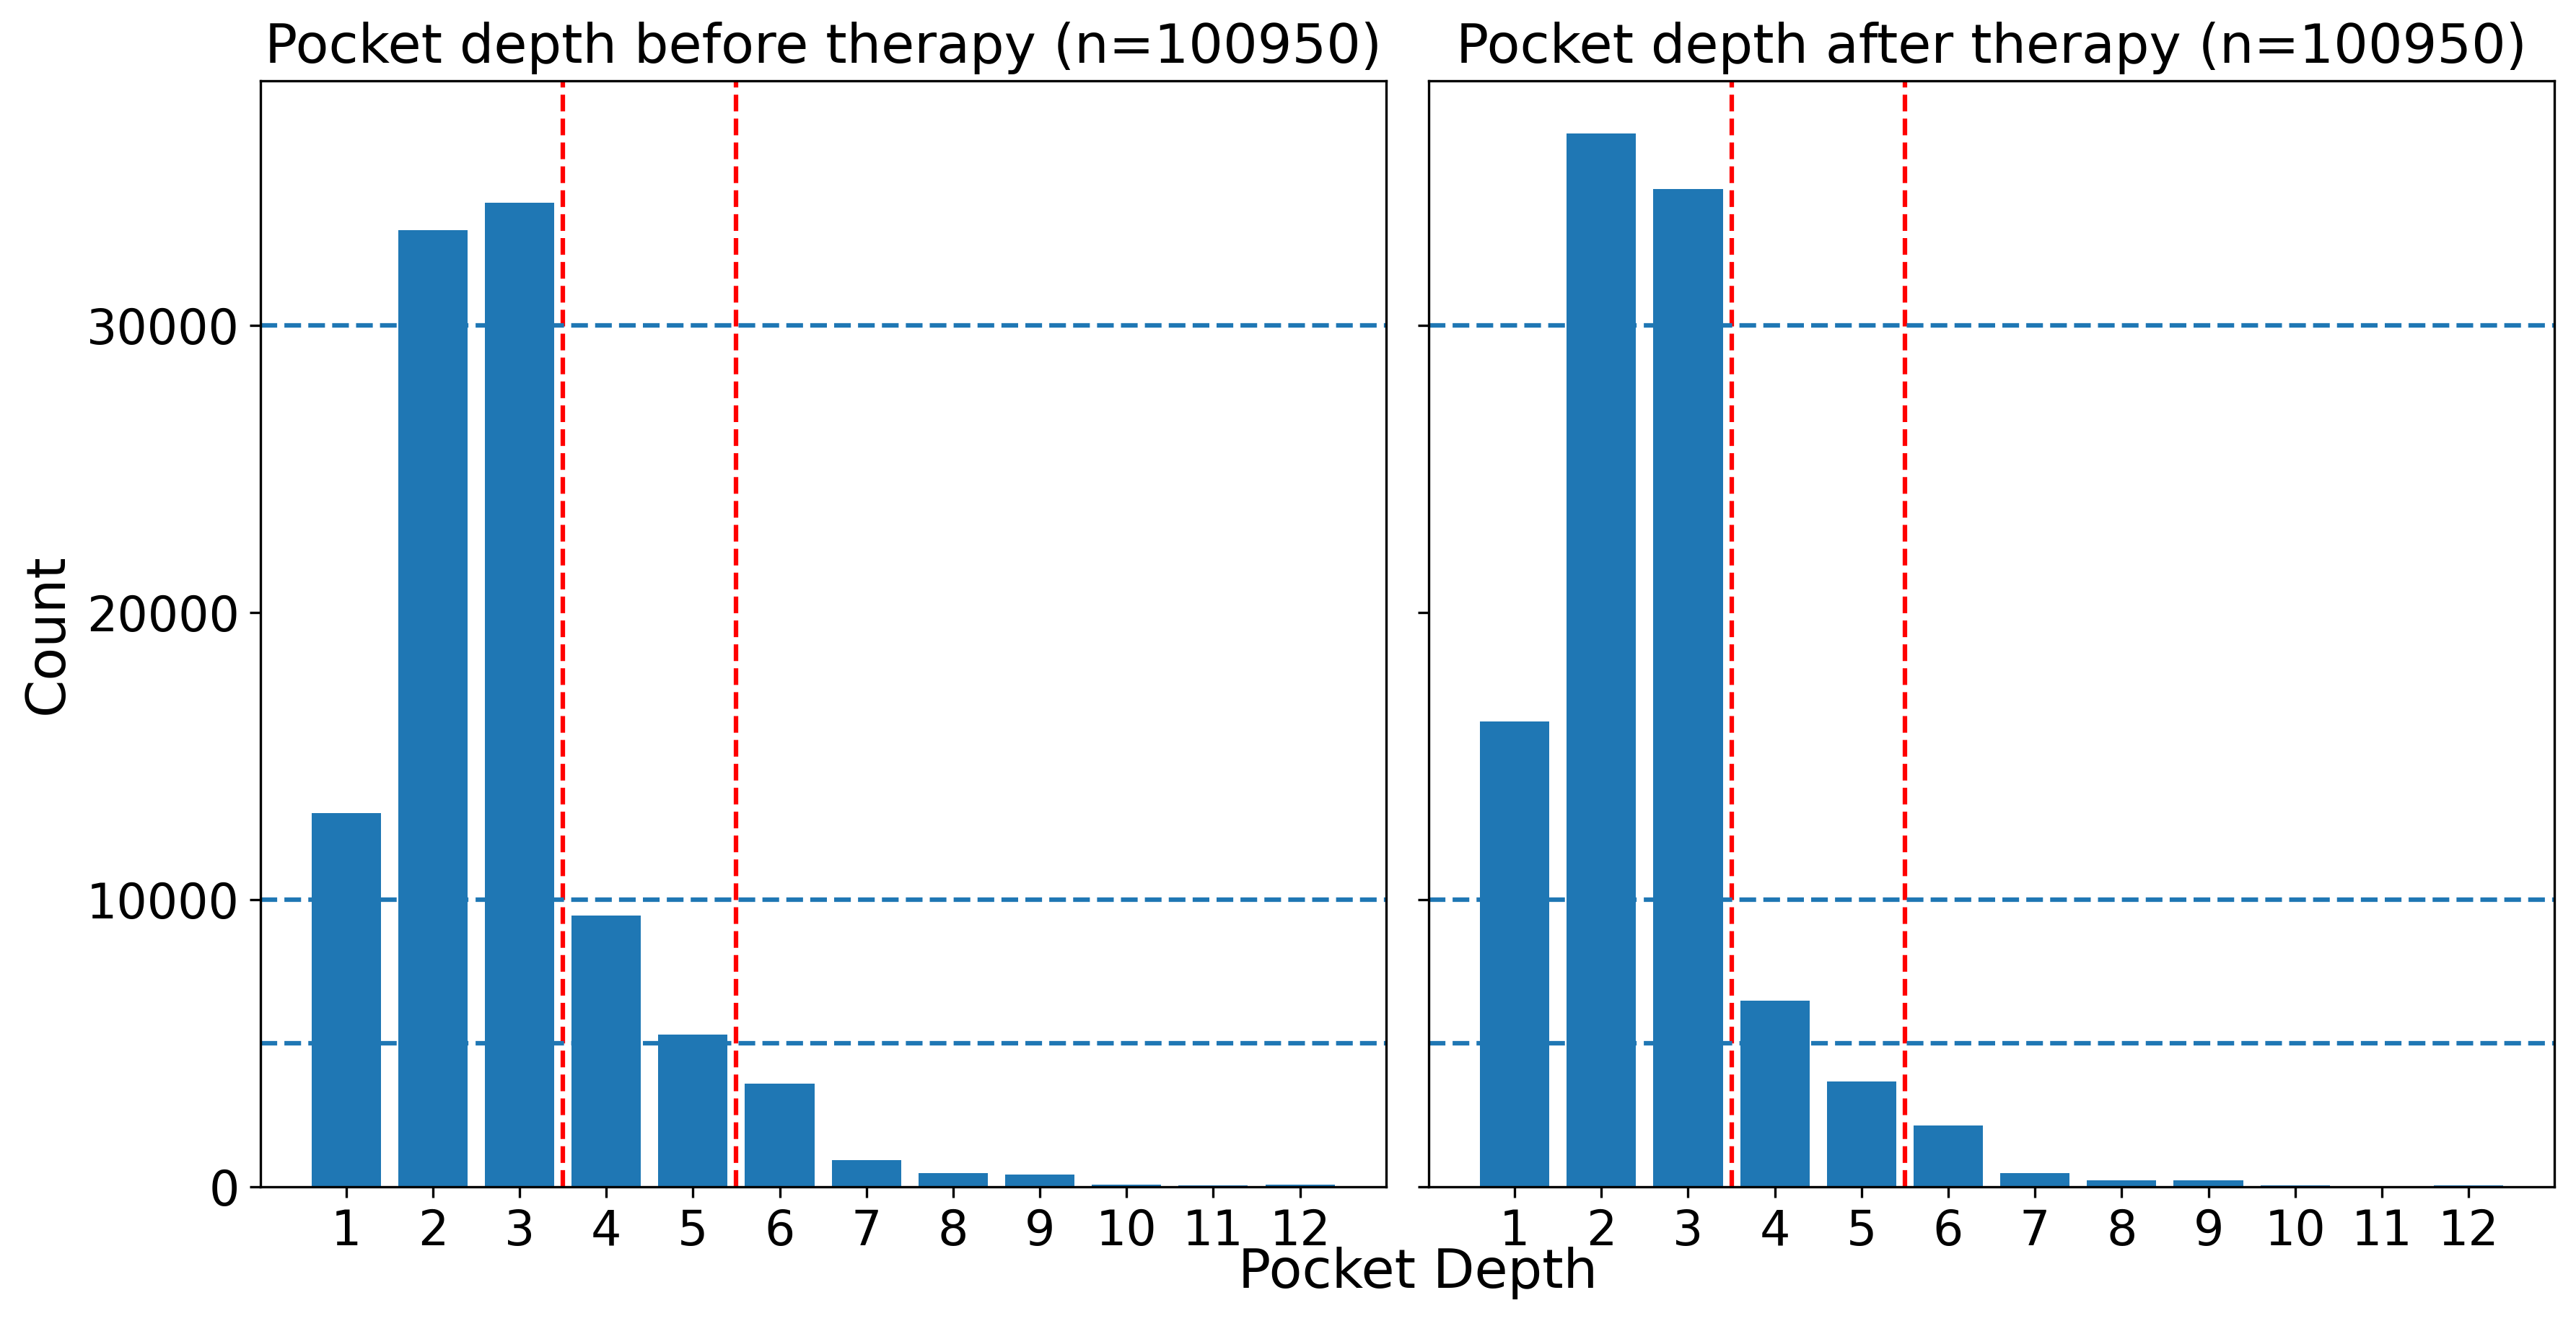

In [4]:
plotter.pocket_comparison("pdbaseline", "pdrevaluation")

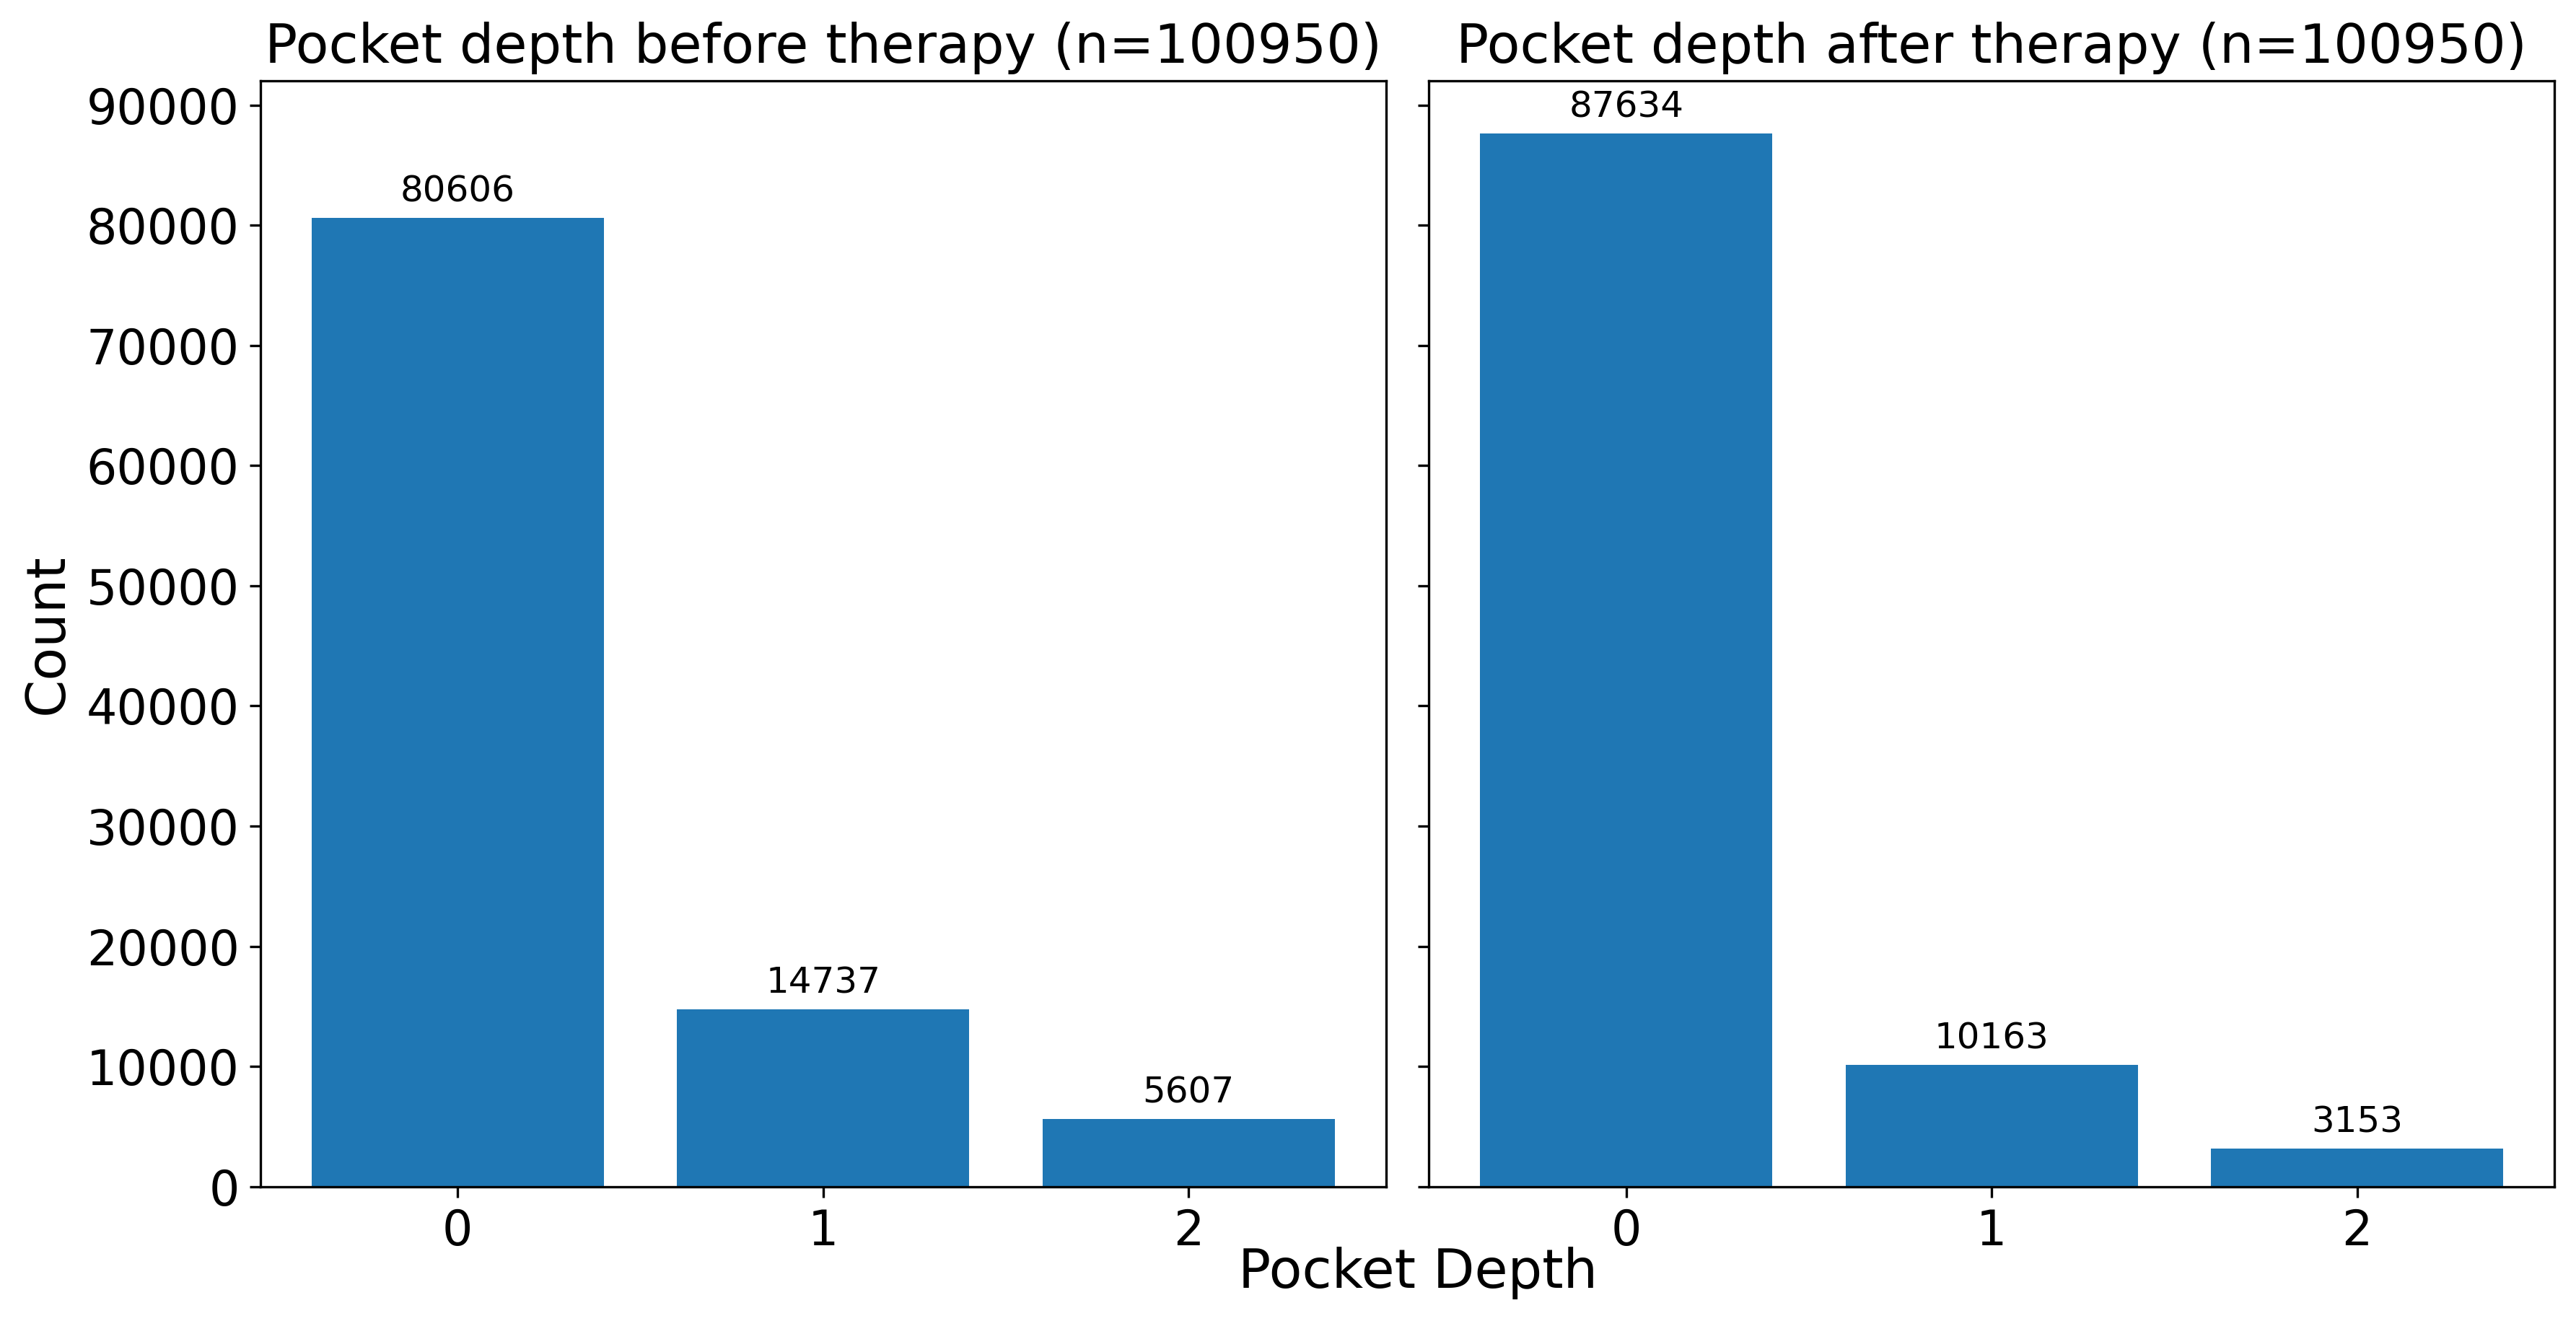

In [5]:
plotter.pocket_group_comparison("pdbase", "pdgroup")

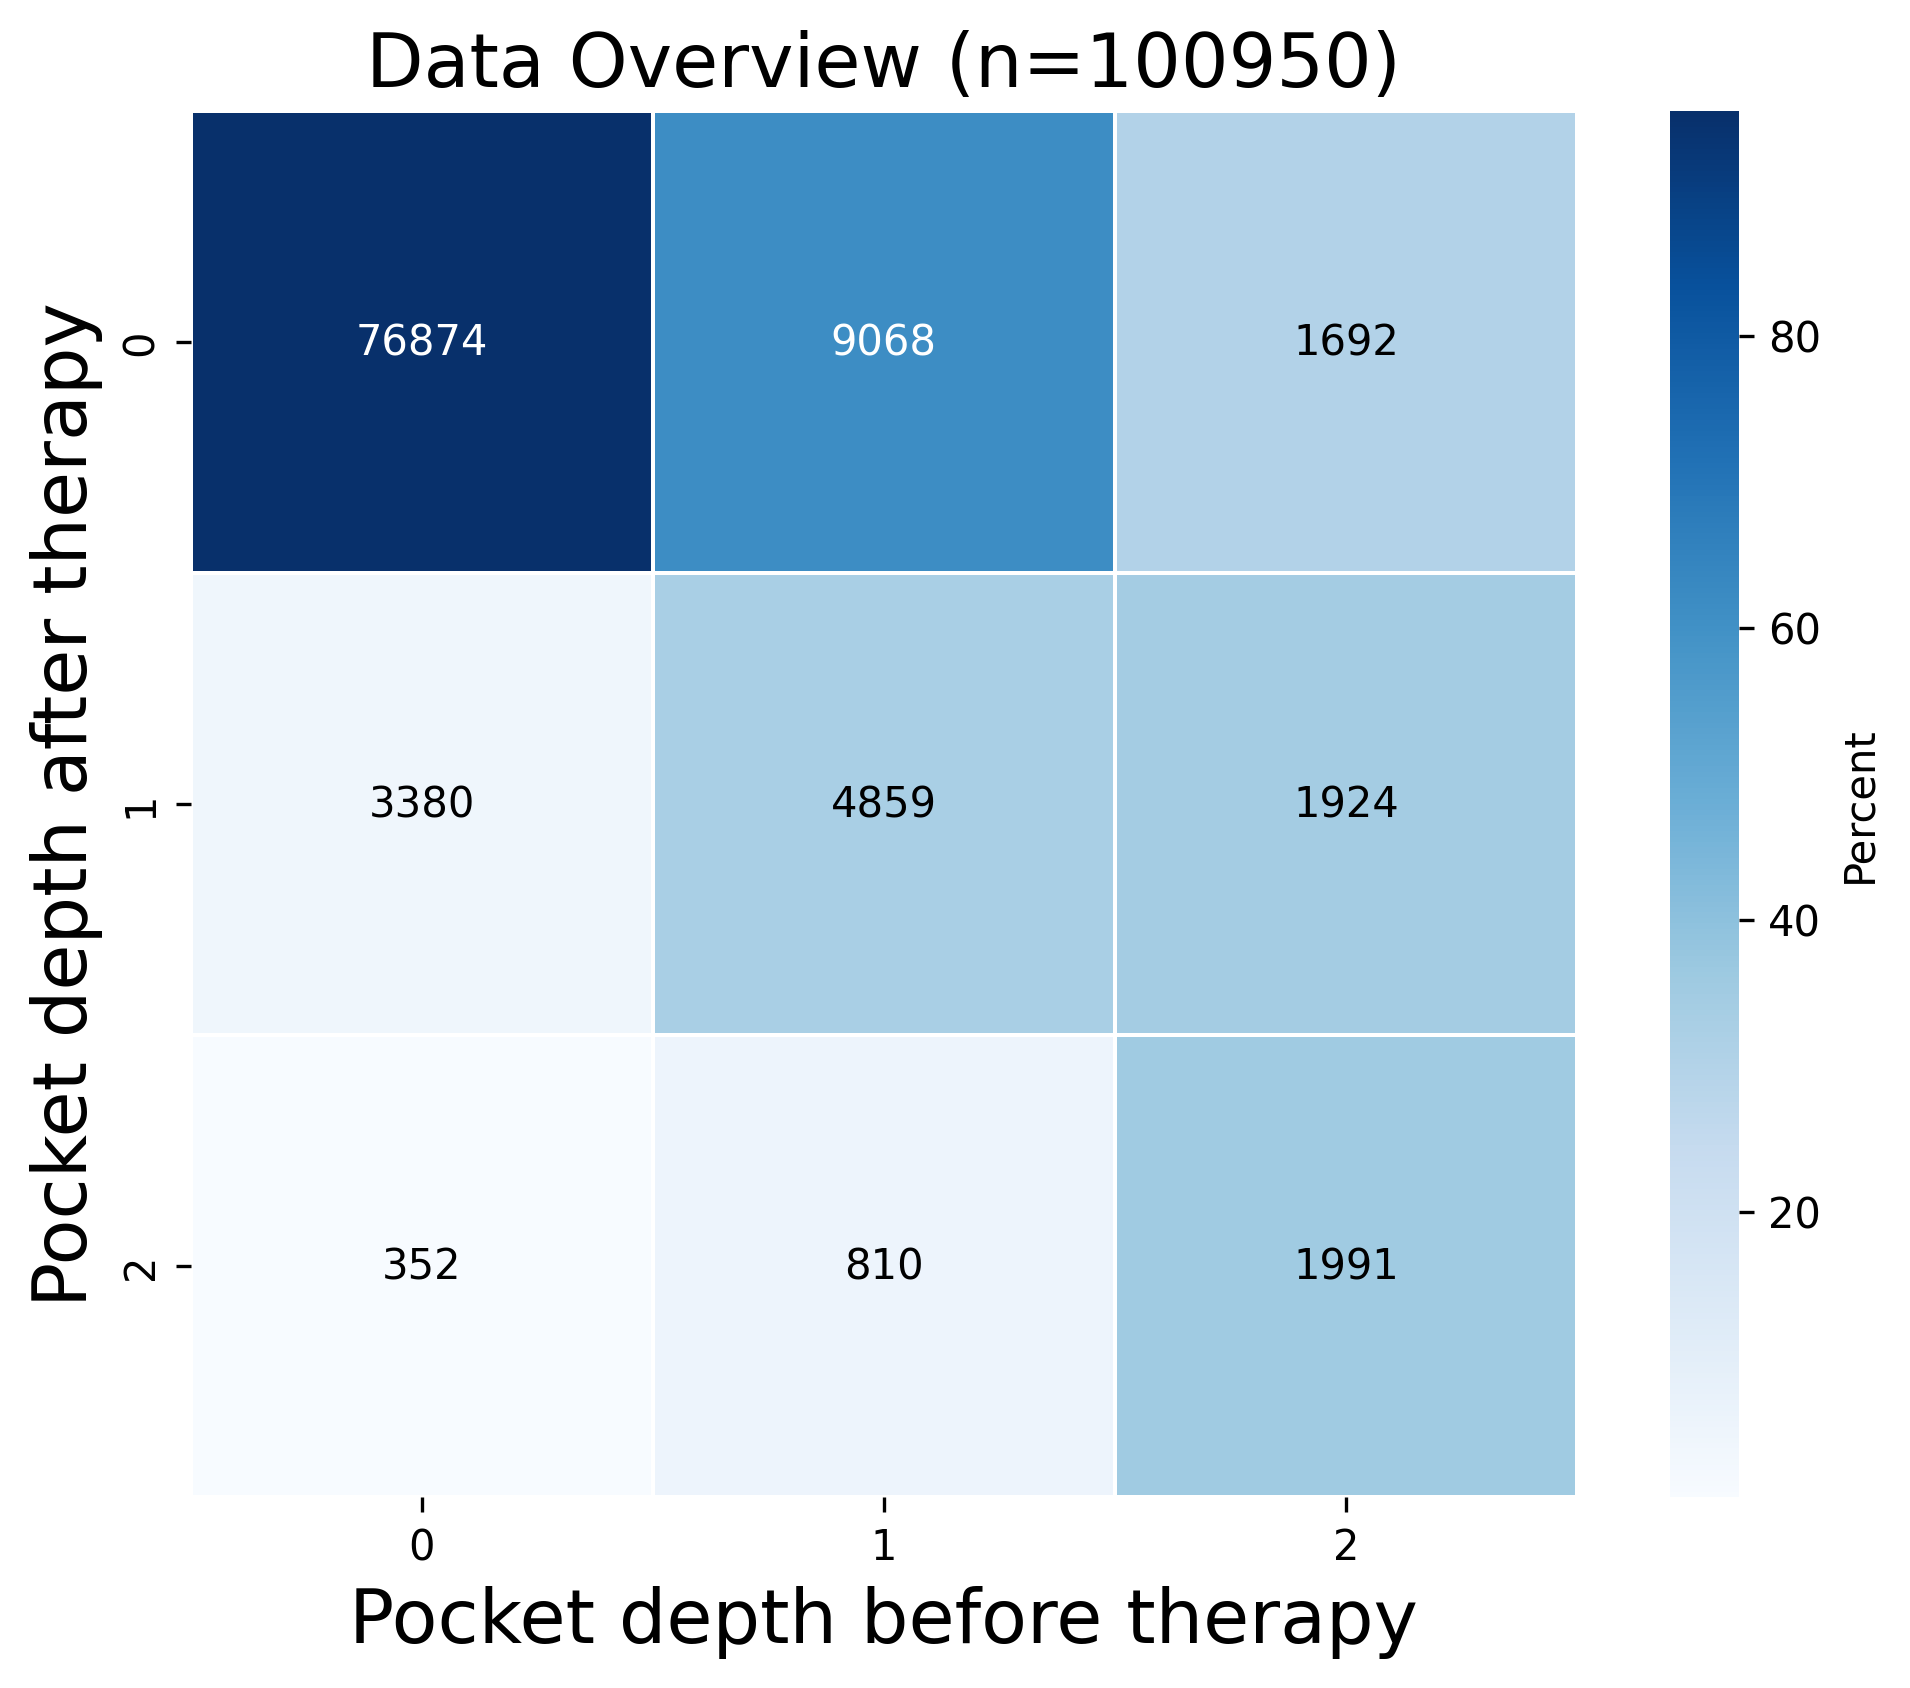

In [6]:
plotter.plt_matrix("pdgroup", "pdbase", "Blues", len(df["pdgroup"]), "columns")